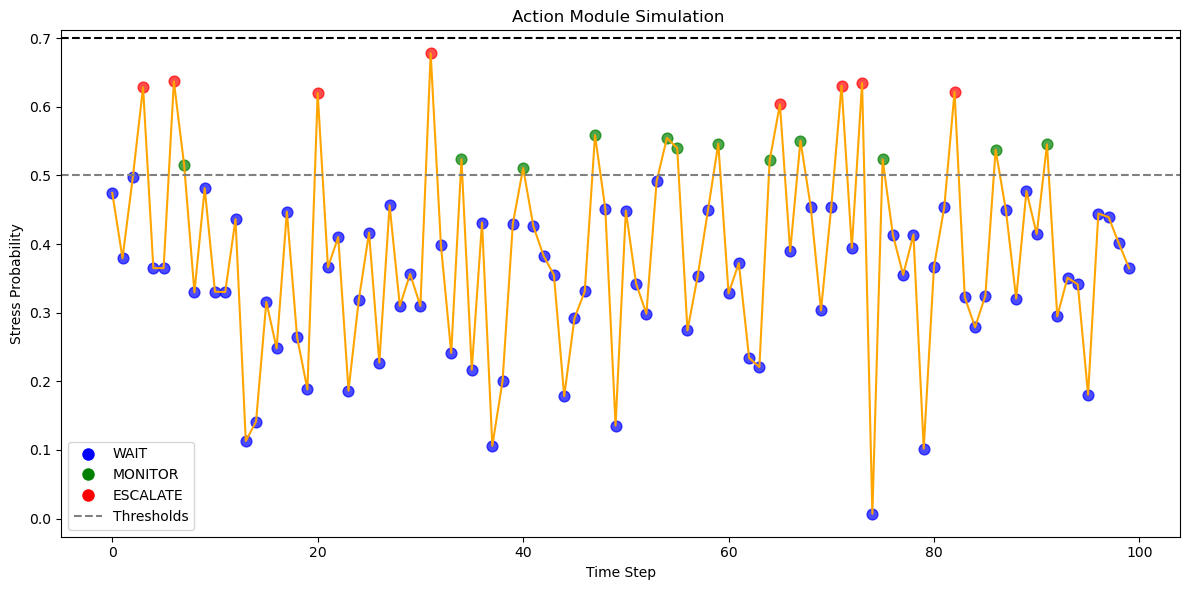

,Step,Stress_Prob,True_Action,Predicted_Action,Correct
0,0,0.475,WAIT,WAIT,True
1,1,0.379,WAIT,WAIT,True
2,2,0.497,WAIT,WAIT,True
3,3,0.628,MONITOR,ESCALATE,False
4,4,0.365,WAIT,WAIT,True
...,...,...,...,...,...
95,95,0.180,WAIT,WAIT,True
96,96,0.444,WAIT,WAIT,True
97,97,0.439,WAIT,WAIT,True
98,98,0.401,WAIT,WAIT,True


    Step  Stress_Prob True_Action Predicted_Action  Correct
0      0        0.475        WAIT             WAIT     True
1      1        0.379        WAIT             WAIT     True
2      2        0.497        WAIT             WAIT     True
3      3        0.628     MONITOR         ESCALATE    False
4      4        0.365        WAIT             WAIT     True
..   ...          ...         ...              ...      ...
95    95        0.180        WAIT             WAIT     True
96    96        0.444        WAIT             WAIT     True
97    97        0.439        WAIT             WAIT     True
98    98        0.401        WAIT             WAIT     True
99    99        0.365        WAIT             WAIT     True

[100 rows x 5 columns]


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from sklearn.metrics import accuracy_score

# 1️⃣ Simulate stress probability stream
np.random.seed(42)
n_steps = 100
stress_stream = np.clip(np.random.normal(0.4, 0.15, n_steps), 0, 1)

# 2️⃣ Define action thresholds
def action_module(prob):
    if prob > 0.6:
        return "ESCALATE"
    elif prob > 0.5:
        return "MONITOR"
    else:
        return "WAIT"

# 3️⃣ Simulate "ground truth" stress alert triggers (for evaluation purposes)
true_actions = []
for prob in stress_stream:
    if prob > 0.7:
        true_actions.append("ESCALATE")
    elif prob > 0.5:
        true_actions.append("MONITOR")
    else:
        true_actions.append("WAIT")

# 4️⃣ Run action module on stress stream
predicted_actions = [action_module(p) for p in stress_stream]

# 5️⃣ Evaluation and Results
df_actions = pd.DataFrame({
    "Step": np.arange(n_steps),
    "Stress_Prob": stress_stream,
    "True_Action": true_actions,
    "Predicted_Action": predicted_actions
})
df_actions["Correct"] = df_actions["True_Action"] == df_actions["Predicted_Action"]
accuracy = accuracy_score(df_actions["True_Action"], df_actions["Predicted_Action"])

# 6️⃣ Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_actions["Step"], df_actions["Stress_Prob"], color='orange', label='Stress Probability')
colors = {"WAIT": "blue", "MONITOR": "green", "ESCALATE": "red"}

for i, row in df_actions.iterrows():
    plt.scatter(row["Step"], row["Stress_Prob"], color=colors[row["Predicted_Action"]], s=60, alpha=0.7)

plt.axhline(0.5, color='gray', linestyle='--', label="Monitor Threshold")
plt.axhline(0.7, color='black', linestyle='--', label="Escalate Threshold")
plt.title(f"Action Module Simulation ")
plt.xlabel("Time Step")
plt.ylabel("Stress Probability")
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=k,
                             markerfacecolor=v, markersize=10) for k, v in colors.items()]
plt.legend(handles=legend_patches + [plt.Line2D([0], [0], color='gray', linestyle='--', label='Thresholds')])
plt.tight_layout()
plt.savefig("action_module_simulation.jpg", dpi=300, bbox_inches='tight')
plt.show()

# Show final decision dataframe
display(df_actions.round(3))  # for Jupyter
# OR
print(df_actions.round(3))    # for plain Python



In [11]:
plt.savefig("action_module_simulation.jpg", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

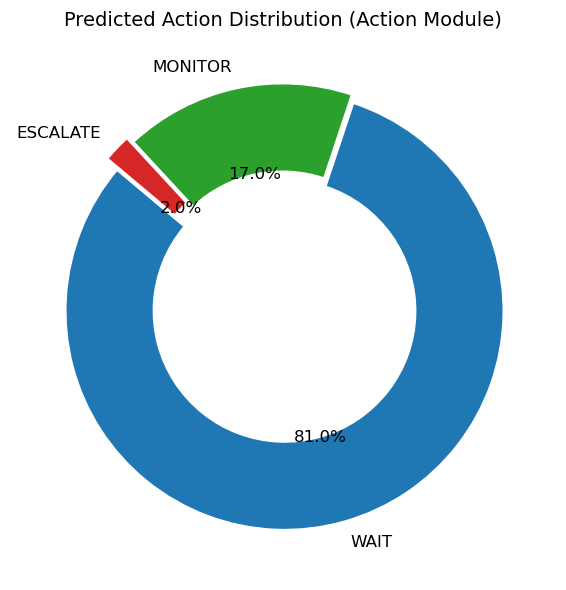

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample prediction count data
action_counts = pd.Series({'WAIT': 81, 'MONITOR': 17, 'ESCALATE': 2})

# Pie chart with better aesthetics
colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red
explode = [0.05 if a == 'ESCALATE' else 0.02 for a in action_counts.index]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    action_counts.values,
    labels=action_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    textprops=dict(color="black", fontsize=12),
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Title and layout
ax.set_title("Predicted Action Distribution (Action Module)", fontsize=14)
plt.tight_layout()
plt.savefig("a2.jpg", dpi=300, bbox_inches='tight')
plt.show()


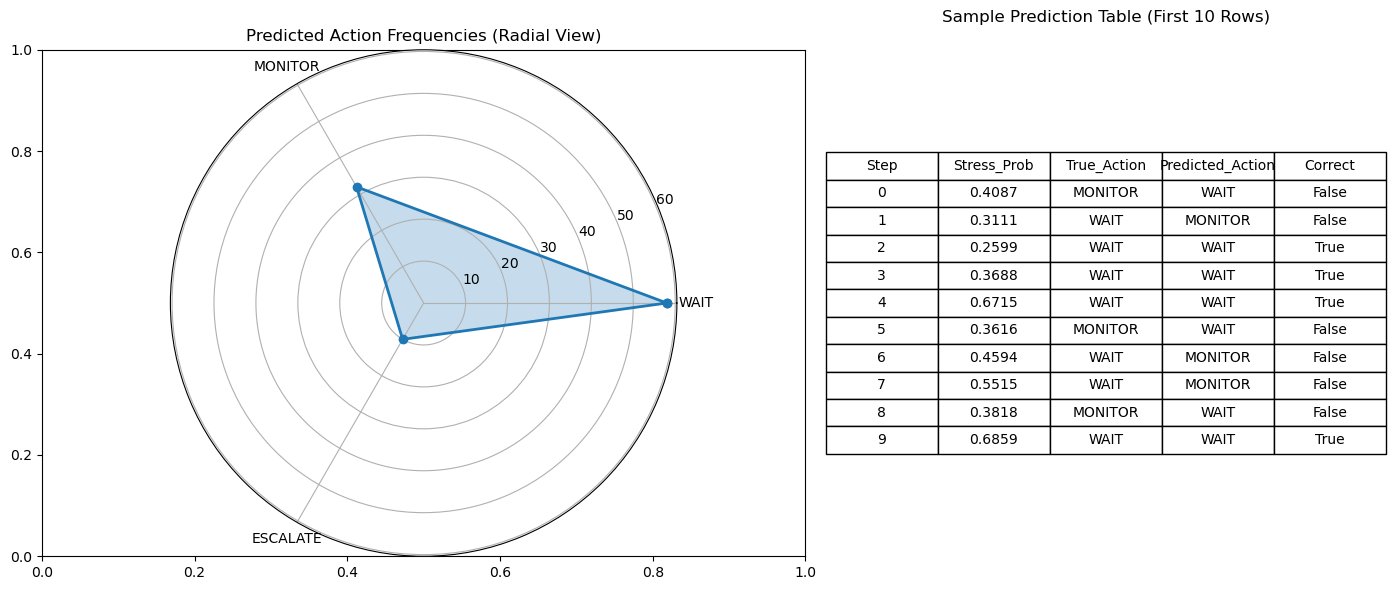

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Simulated data for plotting (replace with actual df_actions if available)
df_actions = pd.DataFrame({
    'Step': range(100),
    'Stress_Prob': np.random.uniform(0.2, 0.7, 100),
    'True_Action': np.random.choice(['WAIT', 'MONITOR', 'ESCALATE'], 100, p=[0.6, 0.3, 0.1]),
    'Predicted_Action': np.random.choice(['WAIT', 'MONITOR', 'ESCALATE'], 100, p=[0.6, 0.3, 0.1])
})
df_actions['Correct'] = df_actions['True_Action'] == df_actions['Predicted_Action']

# ✅ Round stress probabilities for clean table display
df_actions['Stress_Prob'] = df_actions['Stress_Prob'].round(4)

# Count predicted actions
action_counts = df_actions['Predicted_Action'].value_counts().reindex(['WAIT', 'MONITOR', 'ESCALATE'], fill_value=0)

# Setup the side-by-side layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1.5, 1]})

# Left: Stylized radial bar chart
colors = ['#1f77b4', '#2ca02c', '#d62728']
angles = np.linspace(0, 2 * np.pi, len(action_counts), endpoint=False).tolist()
counts = action_counts.values
labels = action_counts.index.tolist()

# Repeat first values to close the circle
counts = np.concatenate((counts, [counts[0]]))
angles += [angles[0]]

axes[0] = plt.subplot(121, polar=True)
axes[0].plot(angles, counts, 'o-', linewidth=2)
axes[0].fill(angles, counts, alpha=0.25)
axes[0].set_thetagrids(np.degrees(angles[:-1]), labels)
axes[0].set_title("Predicted Action Frequencies (Radial View)")

# Right: Display table as heatmap-style annotation
table_data = df_actions[['Step', 'Stress_Prob', 'True_Action', 'Predicted_Action', 'Correct']].head(10)

axes[1].axis('off')
table = axes[1].table(cellText=table_data.values,
                      colLabels=table_data.columns,
                      cellLoc='center',
                      loc='center')
table.scale(1.1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1].set_title("Sample Prediction Table (First 10 Rows)", pad=20)
plt.savefig("a3.jpg", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
